## Úloha 2 - Vizualizace dat

0) povinné importy + načtení dat

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Načtení dat za pomoci knihovny pandas
data = pd.read_csv("cars_dataset.csv")
data

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011
...,...,...,...,...,...,...,...,...,...
46398,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46399,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46400,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46401,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021


1) Graf poměru paliv aut v roce 2019 se zastoupením alespoň 1% 

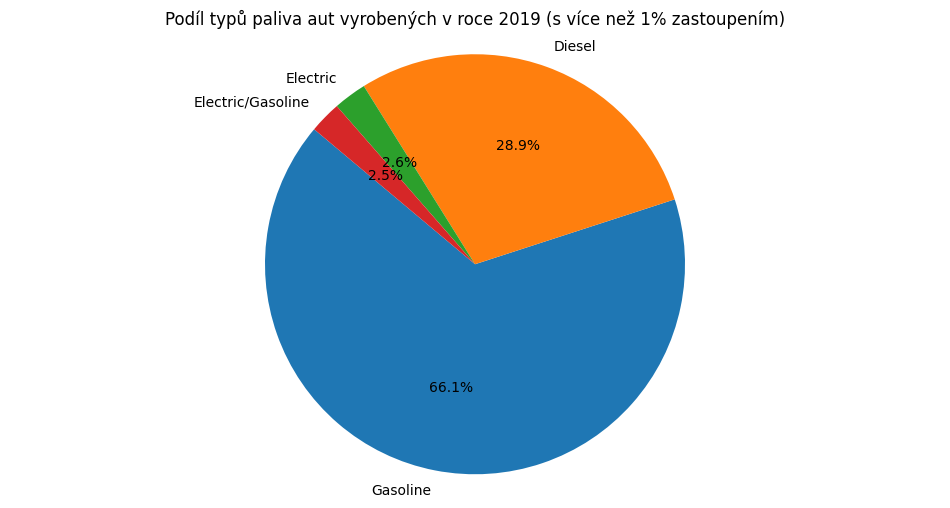

In [20]:
# Filtrace dat pro rok 2019
data_2019 = data[data['year'] == 2019]

# Spočítání počtu aut pro každý typ paliva
pocet_paliv = data_2019['fuel'].value_counts()

# Filtrace paliv s méně než 1% zastoupením
minimum = 0.01
pocet_paliv_filtrovano = pocet_paliv[pocet_paliv / pocet_paliv.sum() >= minimum]

# Vytvoření koláčového grafu
plt.figure(figsize=(12, 6))
plt.pie(pocet_paliv_filtrovano, labels=pocet_paliv_filtrovano.index, autopct='%1.1f%%', startangle=140)
plt.title('Podíl typů paliva aut vyrobených v roce 2019 (s více než 1% zastoupením)')
plt.axis('equal')

# Zobrazení grafu
plt.show()

2) Počet unikátních modelů podle značky výrobce

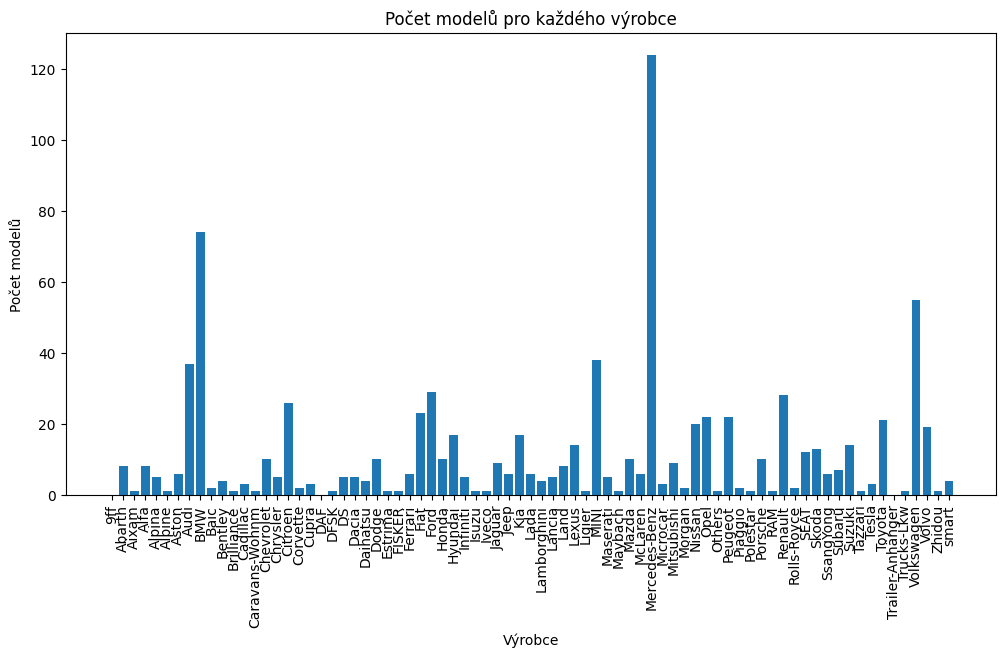

In [21]:
# Spočítání počtu modelů pro každého výrobce
pocet_modelu_znacky = data.groupby('make')['model'].nunique().reset_index()

# Vytvoření sloupcového grafu
plt.figure(figsize=(12, 6))
plt.bar(pocet_modelu_znacky['make'], pocet_modelu_znacky['model'])
plt.xlabel('Výrobce')
plt.ylabel('Počet modelů')
plt.title('Počet modelů pro každého výrobce')
plt.xticks(rotation=90)

# Zobrazení grafu
plt.show()

3) Vývoj nabídky aut s automatickou převodovkou za jednotlivé roky

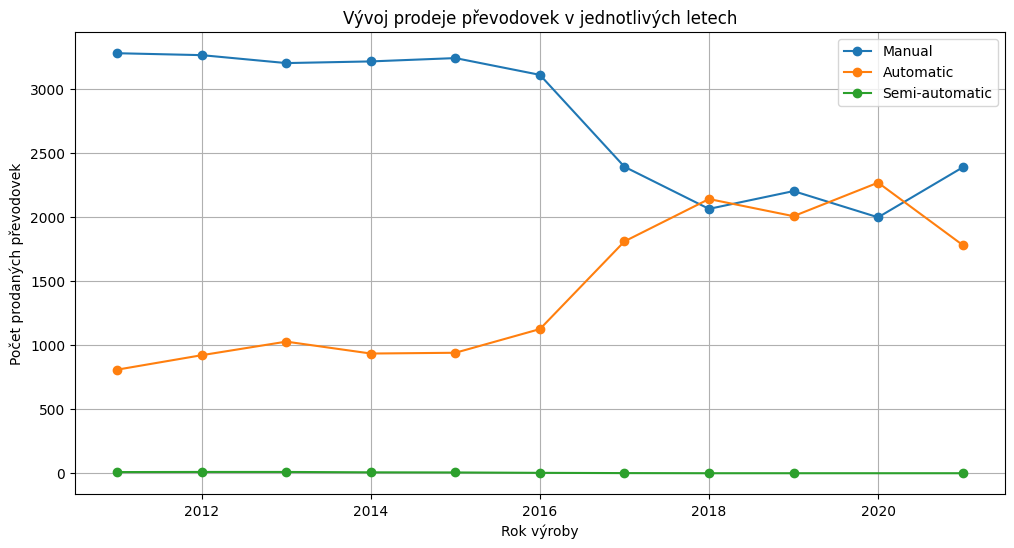

In [22]:
# Výběr řádků, které mají neprázdný sloupec "převodovka"
data_s_prevodovkou = data.dropna(subset=['gear'])

# Vytvoření grafu pro jednotlivé typy převodovek
plt.figure(figsize=(12, 6))
for typ_prevodovky in data_s_prevodovkou['gear'].unique():
    podmnozina = data_s_prevodovkou[data_s_prevodovkou['gear'] == typ_prevodovky] 
    prodeje_podle_roku = podmnozina['year'].value_counts().sort_index()
    plt.plot(prodeje_podle_roku.index, prodeje_podle_roku.values, marker='o', label=typ_prevodovky)

plt.xlabel('Rok výroby')
plt.ylabel('Počet prodaných převodovek')
plt.title('Vývoj prodeje převodovek v jednotlivých letech')
plt.legend()
plt.grid(True)

# Zobrazení grafu
plt.show()

4) Distribuce výkonu automobilů v jednotlivých letech

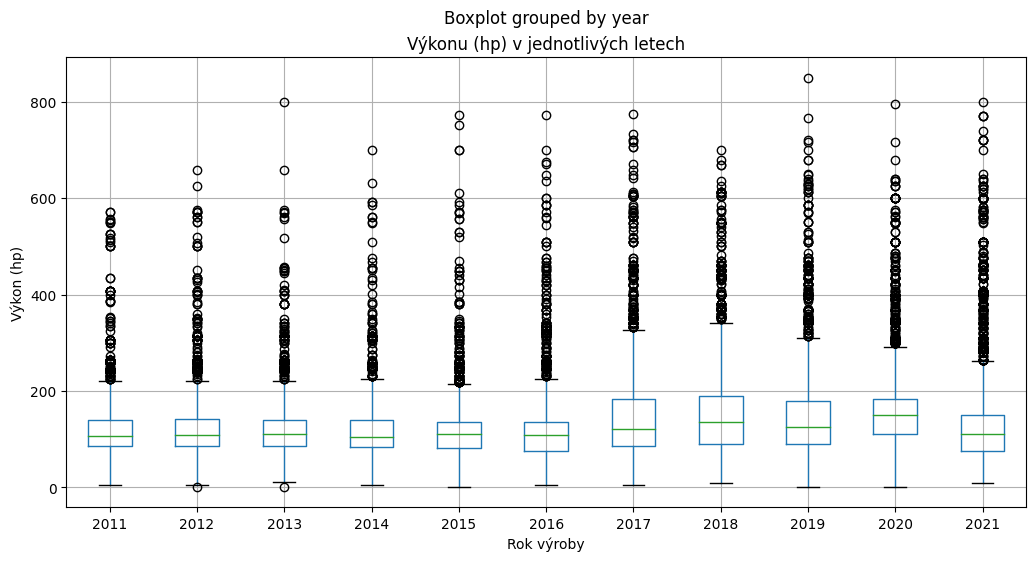

In [23]:
# Vytvoření grafu distribuce výkonu (hp) v jednotlivých letech
fig, ax = plt.subplots(figsize=(12, 6))
data.boxplot(column='hp', by='year', ax=ax)
plt.xlabel('Rok výroby')
plt.ylabel('Výkon (hp)')
plt.title('Výkonu (hp) v jednotlivých letech')
plt.grid(True)

# Zobrazení boxplotu
plt.show()

5) Vývoj průměrné ceny auta značky Volkswagen

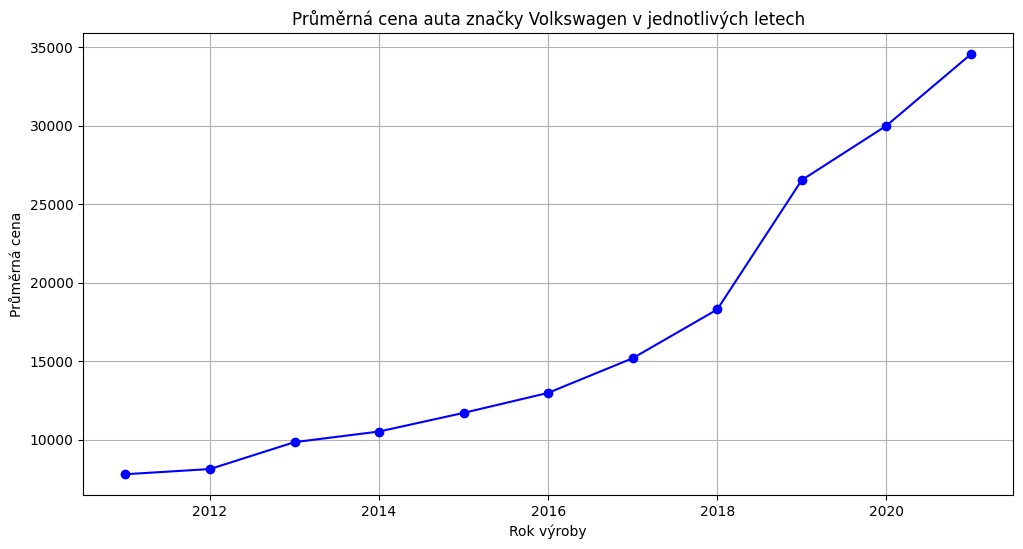

In [24]:
# Filtrace dat pro značku Volkswagen
vw_data = data[data['make'] == 'Volkswagen']

# Výpočet průměrné ceny prodeje auta značky Volkswagen v jednotlivých letech
prumerna_cena = vw_data.groupby('year')['price'].mean()

# Vytvoření grafu průměrné ceny
plt.figure(figsize=(12, 6))
plt.plot(prumerna_cena.index, prumerna_cena.values, marker='o', linestyle='-', color='blue')
plt.xlabel('Rok výroby')
plt.ylabel('Průměrná cena')
plt.title('Průměrná cena auta značky Volkswagen v jednotlivých letech')
plt.grid(True)

# Zobrazení grafu
plt.show()